In [64]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA


In [28]:
df = pd.read_csv('../data/raw/raw.csv')
df

,image_path,label,target,Imagenes
0,non_autistic\0966.jpg,non_autistic,1,[[[0.5254902 0.7254902 0.70980392]\n [0.525...
1,non_autistic\1441.jpg,non_autistic,1,[[[0.46666667 0.4627451 0.42352941]\n [0.470...
2,non_autistic\0852.jpg,non_autistic,1,[[[0.30980392 0.37254902 0.42352941]\n [0.309...
3,autistic\0994.jpg,autistic,0,[[[0.92156863 0.78823529 0.69803922]\n [0.898...
4,non_autistic\0022.jpg,non_autistic,1,[[[0.32156863 0.36862745 0.41568627]\n [0.184...
...,...,...,...,...
2931,autistic\1426.jpg,autistic,0,[[[0.36470588 0.50980392 0.50196078]\n [0.360...
2932,non_autistic\0657.jpg,non_autistic,1,[[[0.99607843 0.99215686 0.97647059]\n [0.996...
2933,autistic\0081.jpg,autistic,0,[[[0.26666667 0.29411765 0.30588235]\n [0.270...
2934,non_autistic\0345.jpg,non_autistic,1,[[[0.96470588 0.89803922 0.49411765]\n [0.960...


In [29]:
def prepare_dataframe(df):
    """
    Esta función procesa un DataFrame agregando una columna 'target' mapeada de la columna 'label',
    procesa las imágenes de las rutas dadas en 'image_path' y reorganiza el DataFrame.

    Args:
        df (pd.DataFrame): DataFrame original con columnas 'image_path' y 'label'.

    Returns:
        pd.DataFrame: DataFrame procesado con columnas adicionales 'target' e 'Imagenes'.
    """
    # Mapeo de etiquetas a valores numéricos
    target_map = {'autistic': 0, 'non_autistic': 1}
    df['target'] = df['label'].map(target_map)

    # Función para leer y escalar imágenes
    def procesar_imagen(path):
        img = cv2.imread(path, 0)
        img_scale = np.array(img) / 255.0
        return img_scale

    # Aplicar la función de procesamiento de imágenes
    df['Imagenes'] = df['image_path'].apply(procesar_imagen)

    # Mezclar y reiniciar índice del DataFrame
    df = df.sample(frac=1).reset_index(drop=True)

    return df

In [30]:
prepare_dataframe(df)

,image_path,label,target,Imagenes
0,autistic\0853.jpg,autistic,0,"[[0.2823529411764706, 0.2549019607843137, 0.13..."
1,non_autistic\0668.jpg,non_autistic,1,"[[0.5647058823529412, 0.5411764705882353, 0.51..."
2,autistic\0152.jpg,autistic,0,"[[0.5529411764705883, 0.5372549019607843, 0.51..."
3,non_autistic\1011.jpg,non_autistic,1,"[[0.4666666666666667, 0.4588235294117647, 0.45..."
4,autistic\0473.jpg,autistic,0,"[[0.8784313725490196, 0.7568627450980392, 0.70..."
...,...,...,...,...
2931,non_autistic\0865.jpg,non_autistic,1,"[[0.21176470588235294, 0.21176470588235294, 0...."
2932,autistic\0446.jpg,autistic,0,"[[0.08235294117647059, 0.11764705882352941, 0...."
2933,autistic\1074.jpg,autistic,0,"[[0.30196078431372547, 0.3137254901960784, 0.3..."
2934,autistic\0395.jpg,autistic,0,"[[0.34509803921568627, 0.34509803921568627, 0...."


In [31]:
img = cv2.imread(df.loc[0]['image_path'], 0)

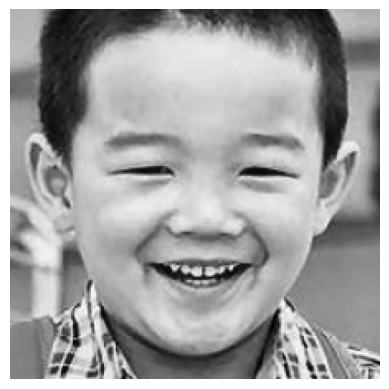

In [32]:
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show();

## Voy a seleccionar 10 imágenes de cada clase para visualizarla


In [33]:
autistic_sample = df[df['label']== 'autistic'].sample(10)
non_autistic_sample = df[df['label']== 'non_autistic'].sample(10)

In [34]:
autistic_sample

,image_path,label,target,Imagenes
2317,autistic\0985.jpg,autistic,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99..."
1605,autistic\1157.jpg,autistic,0,"[[0.3686274509803922, 0.3686274509803922, 0.36..."
728,autistic\1409.jpg,autistic,0,"[[0.5098039215686274, 0.5568627450980392, 0.62..."
562,autistic\1148.jpg,autistic,0,"[[0.9333333333333333, 0.9294117647058824, 0.92..."
2088,autistic\1416.jpg,autistic,0,"[[0.36470588235294116, 0.3607843137254902, 0.3..."
46,autistic\1145.jpg,autistic,0,"[[0.9725490196078431, 0.9725490196078431, 0.97..."
2019,autistic\0085.jpg,autistic,0,"[[0.4235294117647059, 0.43137254901960786, 0.4..."
692,autistic\0436.jpg,autistic,0,"[[0.3607843137254902, 0.3568627450980392, 0.36..."
1095,autistic\0931.jpg,autistic,0,"[[0.7607843137254902, 0.7411764705882353, 0.73..."
2876,autistic\0472.jpg,autistic,0,"[[0.9333333333333333, 0.9333333333333333, 0.93..."


In [35]:
def mostrar_imagenes(imagenes1, imagenes2, titulo1, titulo2):
    fig, axes = plt.subplots(2, 10, figsize=(20, 4))
    
    # Establecer títulos para cada fila
    axes[0, 0].set_title(titulo1, fontsize=14)
    axes[1, 0].set_title(titulo2, fontsize=14)

    # Mostrar imágenes autistas
    for img, ax in zip(imagenes1, axes[0]):
        ax.imshow(img, cmap='gray')
        ax.axis('off')

    # Mostrar imágenes no autistas
    for img, ax in zip(imagenes2, axes[1]):
        ax.imshow(img, cmap='gray')
        ax.axis('off')

    plt.tight_layout()
    plt.show()



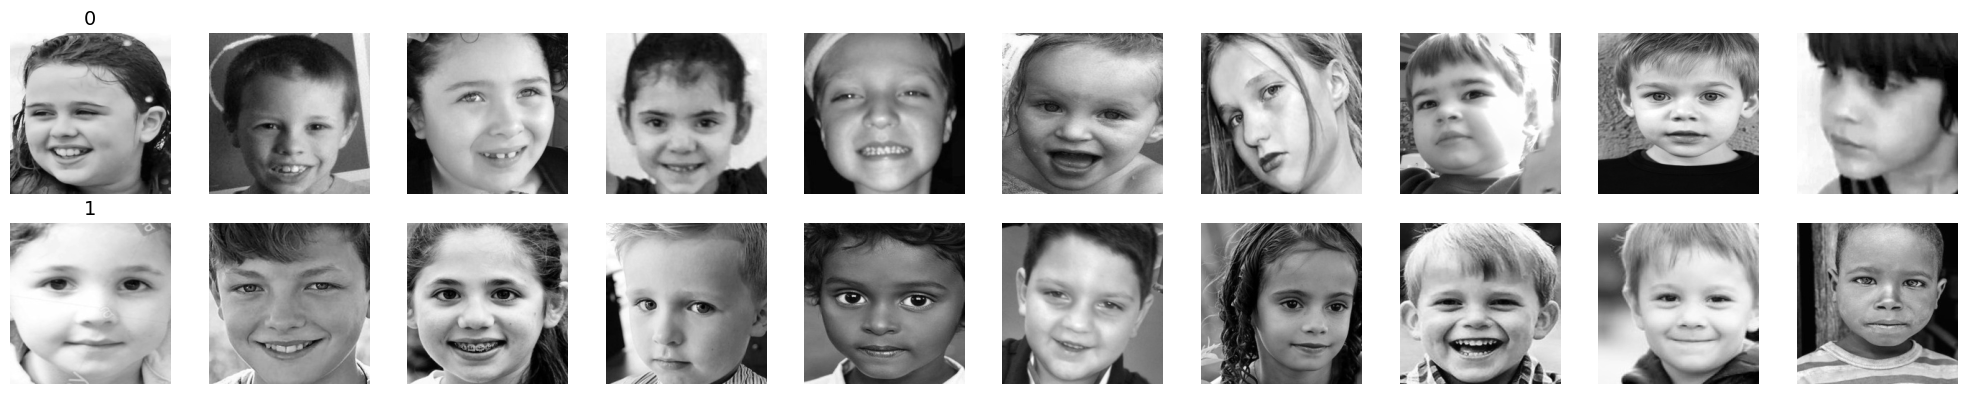

In [36]:
mostrar_imagenes(autistic_sample['Imagenes'], non_autistic_sample['Imagenes'], '0', '1')

In [37]:
class_counts = df['label'].value_counts()

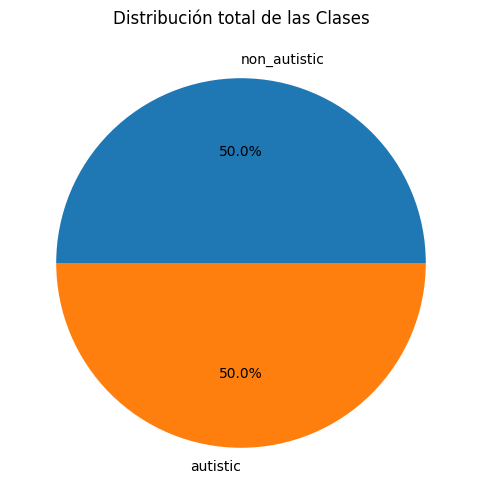

In [38]:
plt.figure(figsize=(10,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribución total de las Clases')
plt.show()

In [68]:
X = df['Imagenes']
y = df['target']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
count_test_class = y_test.value_counts()
count_train_class = y_train.value_counts()

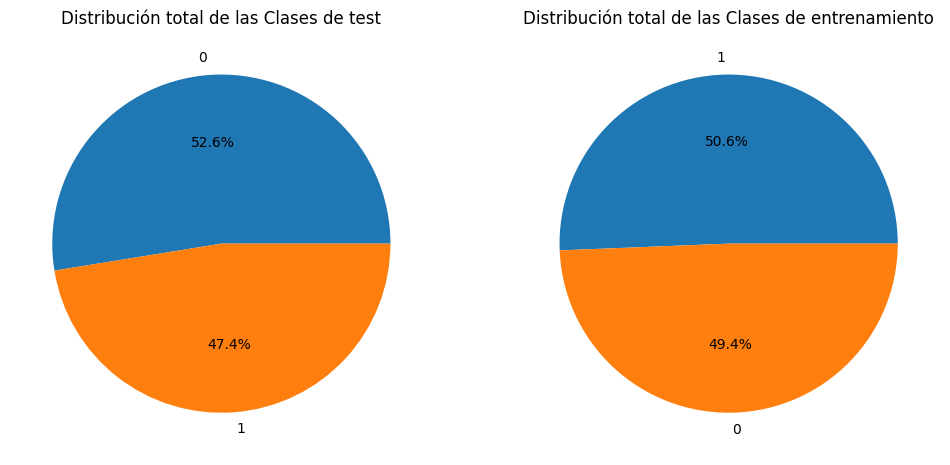

In [81]:
# Crear un subplot
plt.figure(figsize=(12, 6))

# Gráfico de tarta para el conjunto de prueba
plt.subplot(1, 2, 1)
plt.pie(count_test_class, labels=count_test_class.index, autopct='%1.1f%%')
plt.title('Distribución total de las Clases de test')

# Gráfico de tarta para el conjunto de entrenamiento
plt.subplot(1, 2, 2)
plt.pie(count_train_class, labels=count_train_class.index, autopct='%1.1f%%')
plt.title('Distribución total de las Clases de entrenamiento')

# Mostrar el gráfico
plt.show()

In [82]:
# Aplanar las imágenes
X = np.array([img.flatten() for img in df['Imagenes']])
y = df['target']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(2348, 50176)
(588, 50176)
(2348,)
(588,)


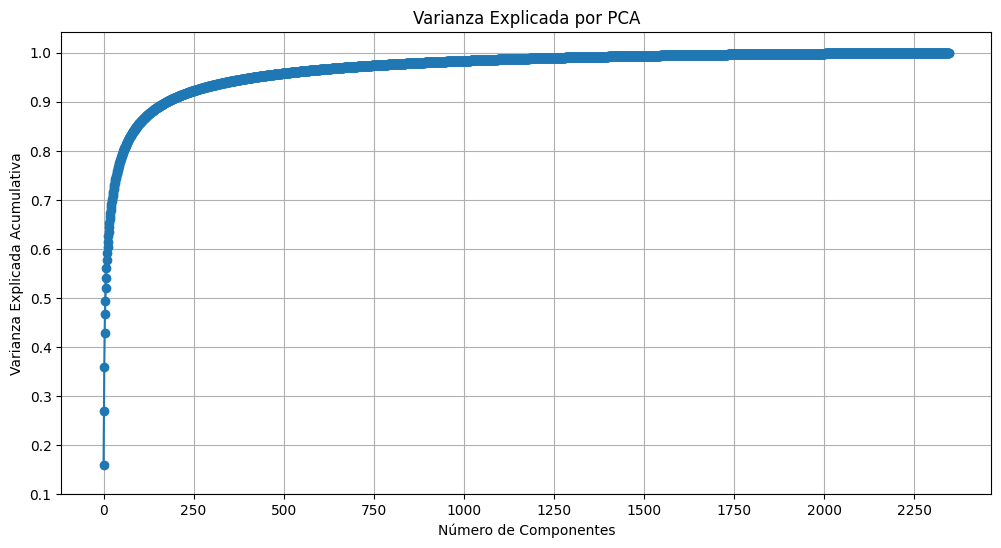

In [86]:
pca = PCA()
pca.fit(X_train)  

# Calcular la varianza explicada acumulativa
varianza_acumulada = pca.explained_variance_ratio_.cumsum()

# Graficar la varianza explicada acumulativa
plt.figure(figsize=(12,6))
plt.plot(varianza_acumulada, marker='o')
plt.xlabel('Número de Componentes')
plt.xticks(range(0, len(varianza_acumulada), 250), range(0, len(varianza_acumulada), 250))
plt.ylabel('Varianza Explicada Acumulativa')
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.title('Varianza Explicada por PCA')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [46]:
pca2 = PCA(n_components=250)  # Conservo apróximadamente el 92% de varianza

X_train_pca = pca2.fit_transform(X_train)
X_test_pca = pca2.transform(X_test)

In [47]:
print (X_train_pca.shape)
print (X_test_pca.shape)


(2348, 250)
(588, 250)


In [48]:
df_pca = pd.DataFrame(X_train_pca)
df_pca.columns = ['PC' + str(i+1) for i in range(df_pca.shape[1])]
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC241,PC242,PC243,PC244,PC245,PC246,PC247,PC248,PC249,PC250
0,-17.627780,-2.617298,17.004345,9.931651,-2.759624,0.892808,-4.902785,-2.742886,-4.643769,-4.349904,...,0.054984,0.845412,-0.188361,0.124271,0.340115,-0.433923,0.188266,-0.025929,-0.387799,0.037016
1,16.640005,-20.950751,-9.797362,-12.932181,-13.394300,-6.292713,0.419905,0.178878,6.635334,3.067554,...,1.325204,0.892822,0.904583,-0.665701,-0.311966,-0.148825,0.307977,-0.382891,0.822594,-1.352840
2,-27.734310,36.294340,3.132797,-2.576969,-8.724740,5.383812,7.218112,-3.147271,-3.523406,3.715300,...,0.223234,-0.419801,-0.426432,0.128047,0.471558,0.847517,0.873570,0.496397,-0.312179,-0.796007
3,-11.787191,-1.701846,5.538323,-16.553568,12.786175,-5.579407,-0.811657,-3.599532,-5.107241,-6.332853,...,0.044244,-0.171024,-0.719843,0.035874,-0.249066,0.028445,0.200560,-0.570414,-0.903440,0.148837
4,-35.087639,32.143783,25.059786,8.122073,7.326460,10.271401,3.256477,-5.656741,4.712522,-9.110174,...,-0.058976,-0.213184,0.115159,-0.241647,0.090159,-0.211217,-0.572480,0.067032,0.353286,-0.331187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,29.248611,9.730560,-7.320365,-11.725434,-23.642527,-4.804386,-13.782193,-9.017527,-9.084834,7.496434,...,-0.489340,-1.228492,-0.550735,0.472648,-1.372761,-0.324223,1.051429,1.037696,-1.869889,-0.440276
2344,9.031075,-14.439320,4.798570,15.773383,-12.757754,-3.961639,21.473375,-6.578412,7.484448,15.944588,...,-0.960641,0.690708,-0.104430,0.118202,0.164944,0.134962,-0.557393,-1.249881,-0.739947,0.648557
2345,4.146159,7.416100,-14.219994,-22.030043,2.574484,-3.860368,-5.415539,6.216829,-0.963016,-1.817768,...,0.160783,0.173368,-0.580594,0.137816,-0.344560,0.221124,0.194090,-0.351539,-0.326411,0.348033
2346,-11.429527,0.414659,11.418988,-7.771413,3.084453,1.479132,-11.795041,-11.719369,-2.621146,3.755887,...,0.622350,-0.377042,-0.675562,-0.373365,0.471338,-0.183180,-0.790981,-0.121481,-0.440621,-0.420365


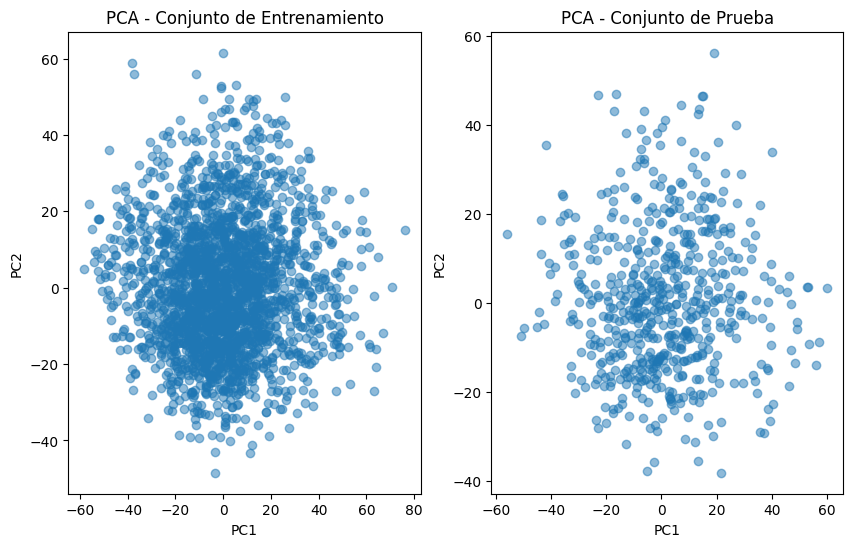

In [87]:
plt.figure(figsize=(10, 6))

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5)
plt.title('PCA - Conjunto de Entrenamiento')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.5)
plt.title('PCA - Conjunto de Prueba')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show();